In [1]:
import matplotlib.pyplot as plt
import numpy as np


In [2]:
def self_attention_graph():
    # Generate random data
    data = np.random.rand(10, 10)
    
    # Compute self-attention weights
    weights = np.dot(data, data.T)
    
    # Plot the graph
    fig, ax = plt.subplots()
    im = ax.imshow(weights, cmap='Blues')
    
    # Add colorbar
    cbar = ax.figure.colorbar(im, ax=ax)
    
    # Set title and axis labels
    ax.set_title("Self-Attention Graph")
    ax.set_xlabel("Sequence Position")
    ax.set_ylabel("Sequence Position")
    
    # Show the plot
    plt.show()

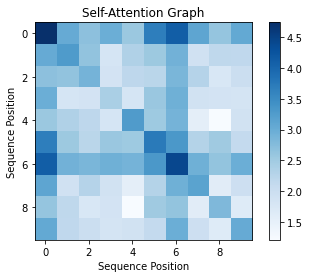

In [3]:
self_attention_graph()

----

In [4]:
import numpy as np
import matplotlib.pyplot as plt


In [5]:
sequence = np.array([1, 2, 3, 4, 5])


In [6]:
def create_input_matrix(sequence):
    input_matrix = np.zeros((len(sequence), len(sequence)))
    for i in range(len(sequence)):
        input_matrix[i, i] = sequence[i]
    return input_matrix

input_matrix = create_input_matrix(sequence)


In [7]:
def self_attention(input_matrix):
    # Calculate self-attention scores using dot product
    attention_scores = np.dot(input_matrix, input_matrix.T)
    
    # Scale the scores to prevent large gradients
    attention_scores /= np.sqrt(input_matrix.shape[-1])
    
    # Apply a softmax function to obtain attention weights
    attention_weights = np.exp(attention_scores) / np.sum(np.exp(attention_scores), axis=1, keepdims=True)
    
    return attention_weights

attention_weights = self_attention(input_matrix)


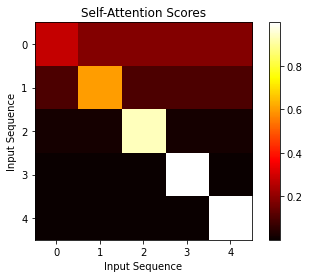

In [8]:
def plot_attention_matrix(attention_weights):
    plt.imshow(attention_weights, cmap='hot', interpolation='nearest')
    plt.colorbar()
    plt.xlabel('Input Sequence')
    plt.ylabel('Input Sequence')
    plt.title('Self-Attention Scores')
    plt.show()

plot_attention_matrix(attention_weights)


----

In [10]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

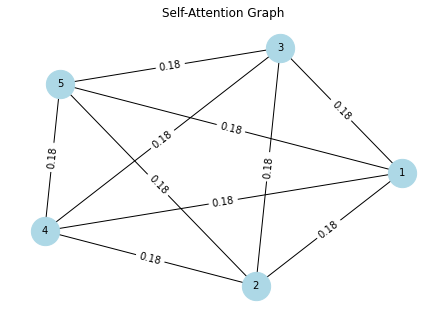

In [11]:
# Define a simple input sequence
sequence = np.array([1, 2, 3, 4, 5])

# Create a graph
G = nx.Graph()

# Add nodes to the graph
for i, val in enumerate(sequence):
    G.add_node(i, value=val)

# Calculate self-attention scores (similar to previous example)
def self_attention(input_matrix):
    attention_scores = np.dot(input_matrix, input_matrix.T)
    attention_scores /= np.sqrt(input_matrix.shape[-1])
    attention_weights = np.exp(attention_scores) / np.sum(np.exp(attention_scores), axis=1, keepdims=True)
    return attention_weights

input_matrix = np.eye(len(sequence))  # Identity matrix as input
attention_weights = self_attention(input_matrix)

# Add edges to the graph based on attention weights
for i in range(len(sequence)):
    for j in range(len(sequence)):
        if i != j:
            weight = attention_weights[i, j]
            G.add_edge(i, j, weight=weight)

# Create a layout for the nodes
pos = nx.spring_layout(G)

# Draw the nodes and edges
node_labels = {i: sequence[i] for i in G.nodes()}
edge_labels = {(i, j): f'{weight:.2f}' for i, j, weight in G.edges(data='weight')}

nx.draw(G, pos, with_labels=True, labels=node_labels, node_size=800, node_color='lightblue', font_size=10)
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.title("Self-Attention Graph")
plt.show()
